# init

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from pymfe.mfe import MFE
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn import svm
import sklearn.metrics as skm
from sklearn import metrics
import pdb
import random

stdTable = "./data/recommender/std-table.csv"
path_arff = "./data/datasets/arff/"
path_index = "./data/index/arff/"
# files_arff = os.listdir(path_arff)

path = "./data/experimento/datasets/selected/cleaned/"
tablePath = savePath = "./data/recommender/meta-features.csv"

metaTablePath = "./metafeatures/meta-table-old.csv"

ccTable = "./metafeatures/meta-table-CC.csv"
accTable = "./metafeatures/meta-table-ACC.csv"
smmTable = "./metafeatures/meta-table-SMM.csv"
hdyTable = "./metafeatures/meta-table-HDy.csv"
dysTable = "./metafeatures/meta-table-DyS.csv"
sordTable = "./metafeatures/meta-table-SORD.csv"
msTable = "./metafeatures/meta-table-MS.csv"
# ms2Table = "./metafeatures/meta-table-MS2.csv"
maxTable = "./metafeatures/meta-table-MAX.csv"
xTable = "./metafeatures/meta-table-X.csv"
t50Table = "./metafeatures/meta-table-T50.csv"

algList = ["CC","ACC","SMM","HDy","DyS","SORD","MS","MAX","X","T50"]
pathList = [ccTable, accTable, smmTable, hdyTable, dysTable, sordTable, msTable, maxTable, xTable, t50Table]

datasets_path = './datasets/'
files = os.listdir(datasets_path)

# preprocess

In [2]:
meta_table = pd.read_csv(metaTablePath)
arr_table = meta_table.drop(columns=meta_table.columns.tolist()[110::-1])
meta_table.drop(columns=meta_table.columns.tolist()[111::], inplace=True)
X = meta_table.values

In [3]:
# alg_list = ['arr_PACC', 'arr_PCC', 'arr_MS2']
# arr_table.drop(columns=alg_list, inplace=True) 
arr_table

,arr_CC,arr_ACC,arr_PACC,arr_PCC,arr_SMM,arr_HDy,arr_DyS,arr_SORD,arr_MS,arr_MS2,arr_MAX,arr_X,arr_T50
0,0.936065,1.042711,1.092967,0.948839,1.093975,1.082462,1.100110,1.101287,1.071621,0.964975,1.073469,1.074394,0.647810
1,1.056074,1.038274,1.041978,0.981800,1.079929,1.010263,1.073152,1.073694,1.071435,0.924966,1.054538,1.038274,0.702777
2,0.825215,1.016408,1.033851,0.884995,1.134528,1.120557,1.161708,1.147822,1.056459,1.013953,1.129786,1.129448,0.653328
3,0.737679,0.905286,0.833495,0.864708,1.213260,1.126051,1.232177,1.241163,1.059178,1.049341,1.204085,1.229718,0.739570
4,0.916406,1.004446,1.080258,1.021272,1.123887,0.905157,0.972067,1.078497,1.020293,1.021272,1.065291,1.150494,0.767717
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1.069850,1.064520,1.067072,1.053108,1.067748,1.052733,1.075256,1.074280,1.075856,1.026381,1.066322,1.063619,0.569837
129,1.076372,1.071567,1.066763,1.066544,1.067709,1.054969,1.062686,1.073533,1.073023,1.067054,1.072004,1.066180,0.550028
130,1.054204,1.059643,1.061299,1.014079,1.071547,1.050026,1.084712,1.078248,1.079351,0.985700,1.070207,1.059013,0.602500
131,1.075281,1.065562,1.067385,1.048403,1.064272,1.049087,1.070118,1.072699,1.071181,1.018109,1.065562,1.067309,0.577213


In [4]:
instance_len = len(X)
knn = NearestNeighbors(n_neighbors=11)
ranking_table = pd.DataFrame(columns=arr_table.columns)

for i in range(0, instance_len):
   X_train = np.delete(X, i, 0)
   X_test = [X[i]]

   knn.fit(X_train)
   neighbors = knn.kneighbors(X=X_test)
   
   dt = 0
   for dist in neighbors[0].tolist()[0]:
      if dist == 0.0: ################################## GAMBIARRA ABSURDA -> CORRIGIR DEPOIS
         dist = 0.0000000000000001
      dt += (1 / dist)

   weight_list = []
   for dist in neighbors[0].tolist()[0]:
      if dist == 0.0: ################################## GAMBIARRA ABSURDA -> CORRIGIR DEPOIS
         dist = 0.0000000000000001
      weight_list.append((1 / dist) / dt)


   arr_list = [0] * len(arr_table.columns)
   weight_list_index = 0
   for neighbor in neighbors[1].tolist()[0]:

      arr_list_index = 0
      for arr in arr_table.loc[neighbor].tolist():
         arr_list[arr_list_index] += weight_list[weight_list_index] * arr
         arr_list_index += 1
      
      weight_list_index += 1
   
   ranking_table.loc[len(ranking_table.index)] = arr_list

ranking_table

,arr_CC,arr_ACC,arr_PACC,arr_PCC,arr_SMM,arr_HDy,arr_DyS,arr_SORD,arr_MS,arr_MS2,arr_MAX,arr_X,arr_T50
0,1.008502,1.027076,1.031500,1.010439,1.080941,1.075279,1.105884,1.065343,1.041789,0.983558,1.077245,1.055287,0.677552
1,0.946787,1.039636,0.987127,0.988695,1.064792,1.041608,1.142371,1.102883,1.086936,1.039246,1.114540,1.099800,0.686687
2,0.984280,1.024992,1.044215,0.964371,1.104965,1.026333,1.095436,1.129001,1.033208,1.021836,1.096855,1.096530,0.688484
3,0.996989,1.035273,1.039288,0.966081,1.098719,1.046233,1.102020,1.122329,1.044584,1.009663,1.095720,1.084891,0.667681
4,0.952781,1.038756,1.042586,0.955205,1.109044,0.996670,1.102230,1.102615,1.049876,1.038247,1.115134,1.117734,0.668043
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1.016485,1.050921,1.061525,1.003932,1.080624,1.068763,1.088648,1.086264,1.073010,1.001786,1.070072,1.068707,0.607475
129,1.066461,1.066612,1.064858,1.047683,1.068777,1.045819,1.067717,1.074061,1.073313,1.044217,1.069426,1.067521,0.570577
130,1.046358,1.061127,1.067019,1.005035,1.075739,1.062305,1.091294,1.084774,1.078646,0.974947,1.067255,1.063327,0.600138
131,1.077162,1.067435,1.071356,1.048433,1.067736,1.043682,1.067359,1.075352,1.073467,1.021513,1.067435,1.067812,0.572697


# experiment

## Primeiro algoritmo recomendado está presente no conjunto dos ideias (por Top N)

In [5]:
top = 3

hit = 0
for i in range(0, len(arr_table)):
    true_dict = {}
    j = 0
    true_arr_values = arr_table.loc[i].tolist()
    for column in arr_table.columns.tolist():
        true_dict[column] = true_arr_values[j]
        j += 1
    true_dict = sorted(true_dict.items(), key=lambda x:x[1], reverse=True)


    pred_dict = {}
    j = 0
    pred_arr_values = ranking_table.loc[i].tolist()
    for column in ranking_table.columns.tolist():
        pred_dict[column] = pred_arr_values[j]
        j += 1
    pred_dict = sorted(pred_dict.items(), key=lambda x:x[1], reverse=True)

    for top_index in range(0, top):
        if pred_dict[0][0] == true_dict[top_index][0]:
            hit += 1
            break

acc = hit / len(arr_table)

print('ACURÁCIA: ' + str(acc*100) + '%')

ACURÁCIA: 53.383458646616546%


## Hit Rate

Hit Rate (Top 3): 84.9624060150376%


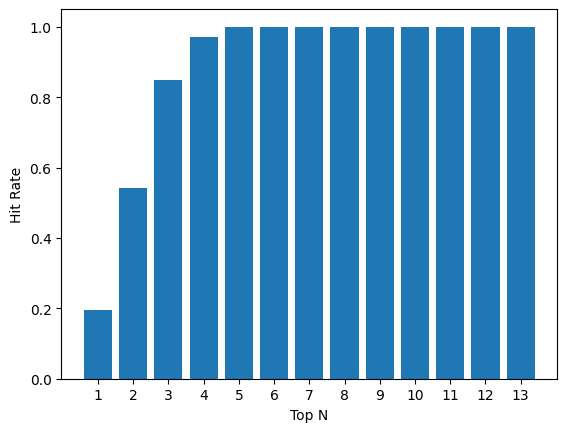

In [10]:
y_axis = []
x_axis = []

for top_ite in range(1, len(arr_table.columns)+1):
    hit_sum = 0
    for i in range(0, len(arr_table)):
        true_dict = {}
        j = 0
        true_arr_values = arr_table.loc[i].tolist()
        for column in arr_table.columns.tolist():
            true_dict[column] = true_arr_values[j]
            j += 1
        true_dict = sorted(true_dict.items(), key=lambda x:x[1], reverse=True)


        pred_dict = {}
        j = 0
        pred_arr_values = ranking_table.loc[i].tolist()
        for column in ranking_table.columns.tolist():
            pred_dict[column] = pred_arr_values[j]
            j += 1
        pred_dict = sorted(pred_dict.items(), key=lambda x:x[1], reverse=True)

        hit = 0
        for pred_index in range(0, top_ite):
            for true_index in range(0, top_ite):
                if pred_dict[pred_index][0] == true_dict[true_index][0]:
                    hit = 1
                    break
            if hit == 1:
                hit_sum += 1
                break
            
    y_axis.append(hit_sum / len(arr_table))
    x_axis.append(top_ite)


top = 3
hit_rate = y_axis[top-1]
print('Hit Rate (Top '+str(top)+'): ' + str(hit_rate*100) + '%')

plt.ylabel('Hit Rate')
plt.xlabel('Top N')
plt.xticks(x_axis)
plt.bar(x_axis, y_axis)
plt.show()

## Recommendation Accuracy

[0.5, 0.5, 0.5, 0.5, 0.5, 0.2, 0.0, 0.5, 0.0, 0.5, 1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.5, 0.5, 0.2, 0.2, 0.5, 0.2, 0.2, 0.0, 0.2, 0.5, 0.2, 0.0, 0.0, 0.5, 0.5, 0.5, 0.2, 0.5, 0.0, 0.0, 0.5, 0.5, 0.2, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.5, 0.5, 0.2, 0.0, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.2, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.0, 0.2, 0.0, 0.5, 0.5, 0.5, 0.5, 0.2, 0.0, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.2, 0.5, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.2, 1.0, 1.0, 0.2, 0.2, 0.0, 0.5, 0.2, 0.5, 0.2, 0.5, 0.2, 0.0, 1.0, 0.5, 0.0, 0.5, 0.2, 0.5, 0.5, 0.5, 0.2, 0.2, 0.5, 0.5, 0.0, 0.2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.2, 0.5, 0.5, 0.5, 1.0, 1.0, 0.2]
Recommendation Accuracy (Top 3): 36.46616541353384%
0.26534003966588876


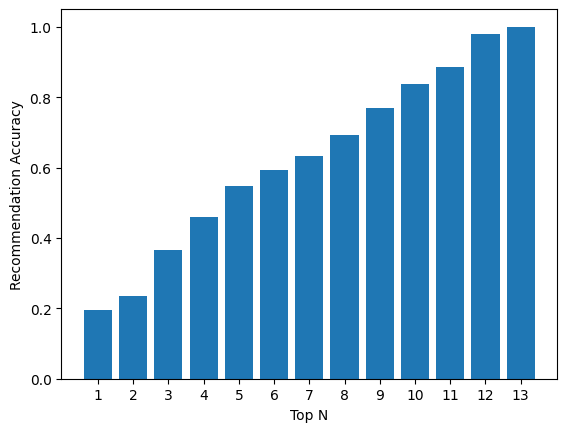

In [16]:
y_axis = []
x_axis = []
std_list = []

for top_ite in range(1, len(arr_table.columns)+1):
    rec_acc_list = []
    for i in range(0, len(arr_table)):
        true_dict = {}
        j = 0
        true_arr_values = arr_table.loc[i].tolist()
        for column in arr_table.columns.tolist():
            true_dict[column] = true_arr_values[j]
            j += 1
        true_dict = sorted(true_dict.items(), key=lambda x:x[1], reverse=True)


        pred_dict = {}
        j = 0
        pred_arr_values = ranking_table.loc[i].tolist()
        for column in ranking_table.columns.tolist():
            pred_dict[column] = pred_arr_values[j]
            j += 1
        pred_dict = sorted(pred_dict.items(), key=lambda x:x[1], reverse=True)

        i = 0
        true_set = set()
        for alg in true_dict:
            if i == top_ite:
                break
            true_set.add(alg[0])
            i += 1        

        i = 0
        pred_set = set()
        for alg in pred_dict:
            if i == top_ite:
                break
            pred_set.add(alg[0])
            i += 1
        
        intersection_set = true_set.intersection(pred_set)
        union_set = true_set.union(pred_set)

        rec_acc_list.append(len(intersection_set) / len(union_set))

        # pdb.set_trace()

    rec_acc_array = np.array(rec_acc_list)
    y_axis.append(rec_acc_array.sum() / len(arr_table))
    x_axis.append(top_ite)
    std_list.append(rec_acc_array.std())
    if top_ite == 3:
        print(rec_acc_list)


top = 3
recommendation_accuracy = y_axis[top-1]
print('Recommendation Accuracy (Top '+str(top)+'): ' + str(recommendation_accuracy*100) + '%')
print(std_list[top-1])

plt.ylabel('Recommendation Accuracy')
plt.xlabel('Top N')
plt.xticks(x_axis)
plt.bar(x_axis, y_axis)
plt.show()

Recommendation Accuracy (Top 3): 36.46616541353385%


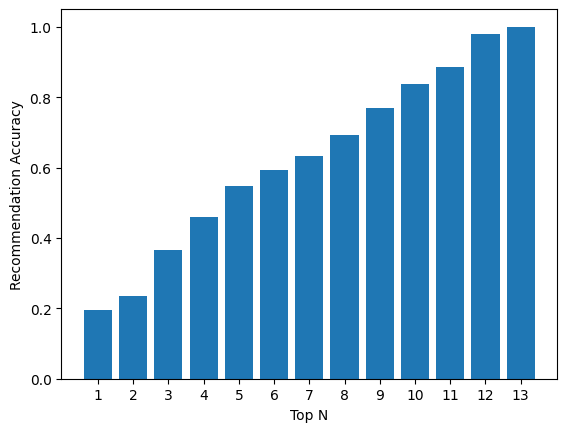

In [11]:
y_axis = []
x_axis = []

for top_ite in range(1, len(arr_table.columns)+1):
    rec_acc_sum = 0
    for i in range(0, len(arr_table)):
        true_dict = {}
        j = 0
        true_arr_values = arr_table.loc[i].tolist()
        for column in arr_table.columns.tolist():
            true_dict[column] = true_arr_values[j]
            j += 1
        true_dict = sorted(true_dict.items(), key=lambda x:x[1], reverse=True)


        pred_dict = {}
        j = 0
        pred_arr_values = ranking_table.loc[i].tolist()
        for column in ranking_table.columns.tolist():
            pred_dict[column] = pred_arr_values[j]
            j += 1
        pred_dict = sorted(pred_dict.items(), key=lambda x:x[1], reverse=True)

        i = 0
        true_set = set()
        for alg in true_dict:
            if i == top_ite:
                break
            true_set.add(alg[0])
            i += 1        

        i = 0
        pred_set = set()
        for alg in pred_dict:
            if i == top_ite:
                break
            pred_set.add(alg[0])
            i += 1
        
        intersection_set = true_set.intersection(pred_set)
        union_set = true_set.union(pred_set)

        rec_acc_sum += len(intersection_set) / len(union_set)

        # pdb.set_trace()

    y_axis.append(rec_acc_sum / len(arr_table))
    x_axis.append(top_ite)


top = 3
recommendation_accuracy = y_axis[top-1]
print('Recommendation Accuracy (Top '+str(top)+'): ' + str(recommendation_accuracy*100) + '%')

plt.ylabel('Recommendation Accuracy')
plt.xlabel('Top N')
plt.xticks(x_axis)
plt.bar(x_axis, y_axis)
plt.show()